In [2]:
from mne import io
from sklearn.utils import shuffle
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def filt_coef(order, cutoff, filt_type, sampleRate):
    Nq = sampleRate//2
    Wn = cutoff / Nq
    b, a = scipy.signal.butter(order, Wn, filt_type)
    return b, a

# Data3

In [3]:
ls = os.listdir(r"..\data\data3_attention\raw")
newls = []
for fname in ls:
    if fname.endswith('11.edf'):
        newls.append(fname)
    if fname.endswith('12.edf'):
        newls.append(fname)
    if fname.endswith('13.edf'):
        newls.append(fname)

In [4]:
print(len(newls))
newls

48


['0002_11.edf',
 '0002_12.edf',
 '0002_13.edf',
 '0004_11.edf',
 '0004_12.edf',
 '0004_13.edf',
 '0005_11.edf',
 '0005_12.edf',
 '0005_13.edf',
 '0006_11.edf',
 '0006_12.edf',
 '0006_13.edf',
 '0007_11.edf',
 '0007_12.edf',
 '0007_13.edf',
 '0009_11.edf',
 '0009_12.edf',
 '0009_13.edf',
 '0013_11.edf',
 '0013_12.edf',
 '0013_13.edf',
 '0201_11.edf',
 '0201_12.edf',
 '0201_13.edf',
 '0401_11.edf',
 '0401_12.edf',
 '0401_13.edf',
 '0502_11.edf',
 '0502_12.edf',
 '0502_13.edf',
 '0601_11.edf',
 '0601_12.edf',
 '0601_13.edf',
 '0701_11.edf',
 '0701_12.edf',
 '0701_13.edf',
 '0801_11.edf',
 '0801_12.edf',
 '0801_13.edf',
 '0901_11.edf',
 '0901_12.edf',
 '0901_13.edf',
 '1101_11.edf',
 '1101_12.edf',
 '1101_13.edf',
 '1301_11.edf',
 '1301_12.edf',
 '1301_13.edf']

Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0002_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0002_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0002_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0004_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_atte

<ipython-input-5-1e0a50b0b09d>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))


Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0201_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0201_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0201_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_attention\raw\0401_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 557999  =      0.000 ...   557.999 secs...
Extracting EDF parameters from D:\GitHub\EEG_fatigue\data\data3_atte

KeyboardInterrupt: 

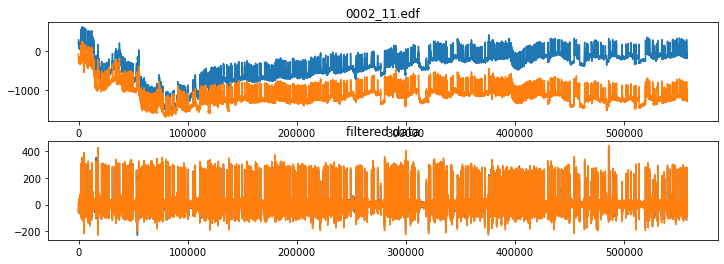

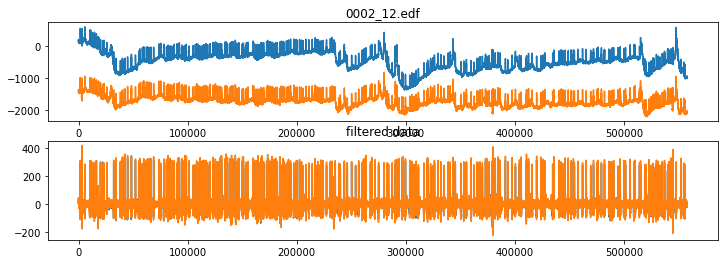

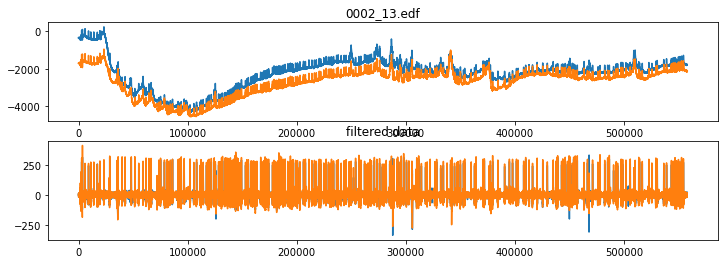

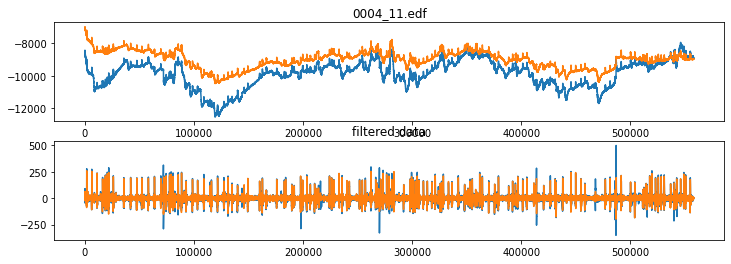

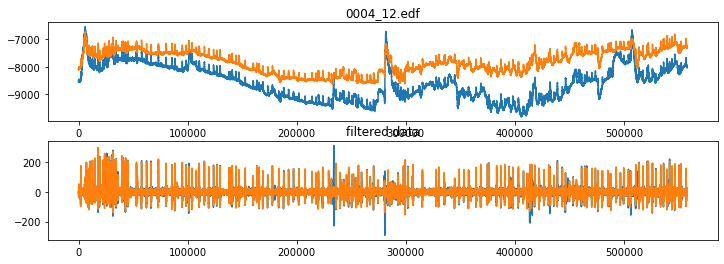

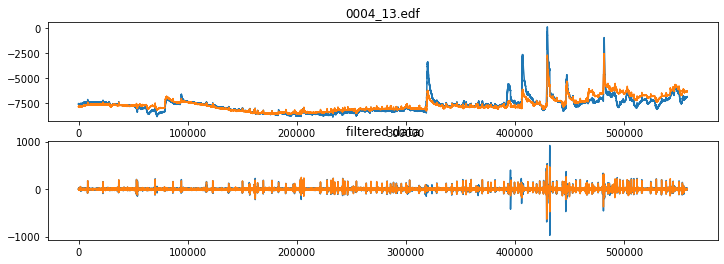

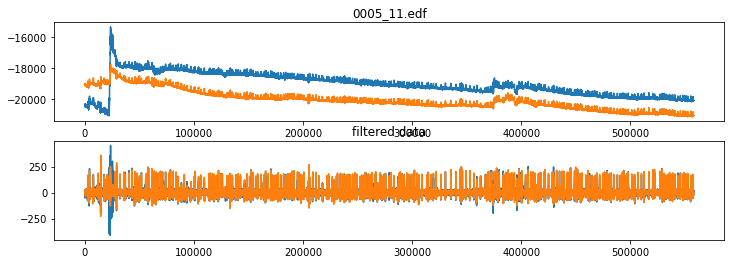

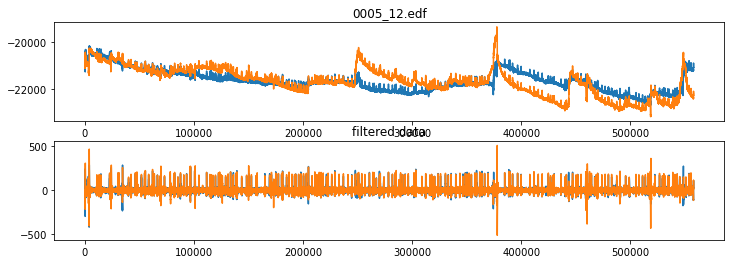

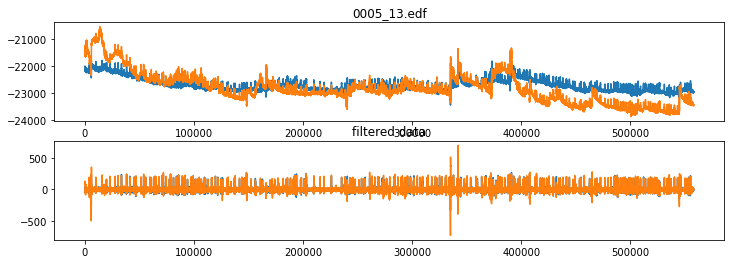

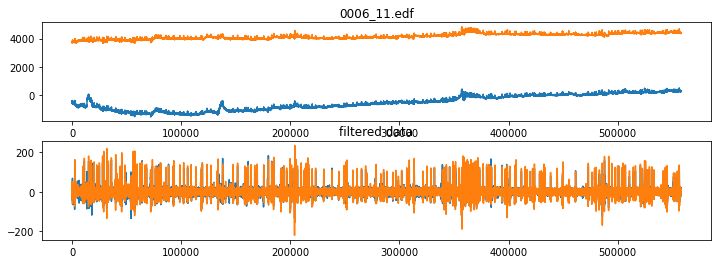

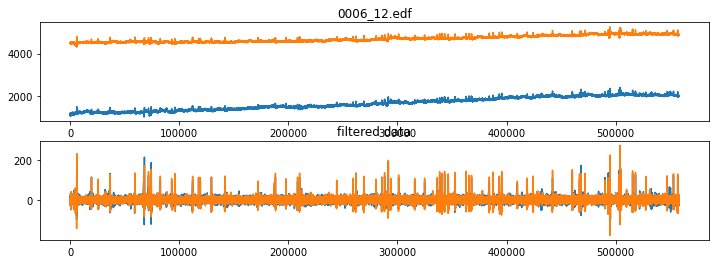

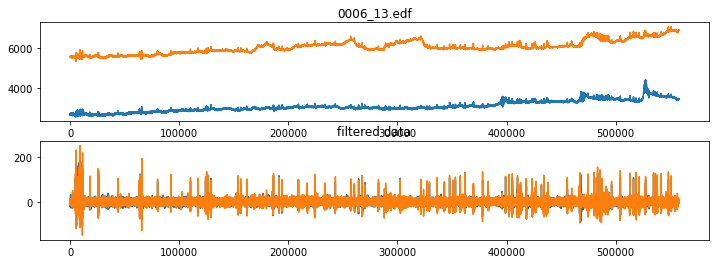

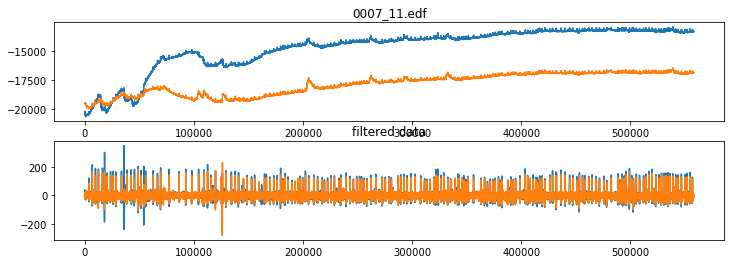

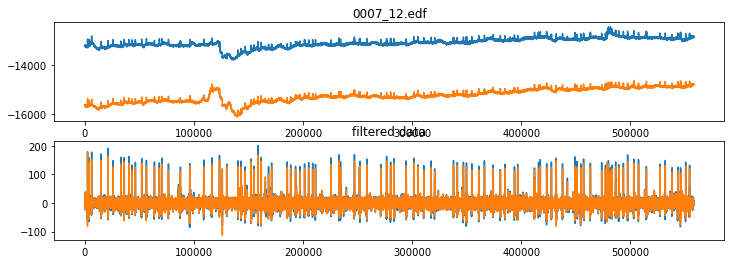

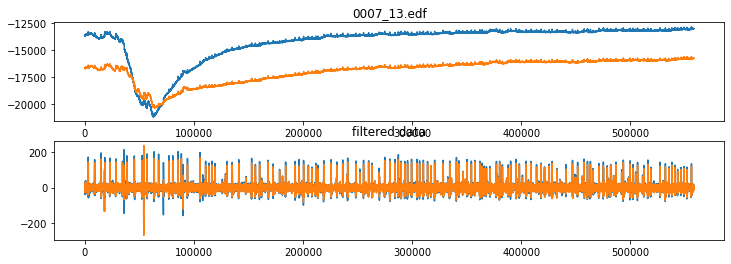

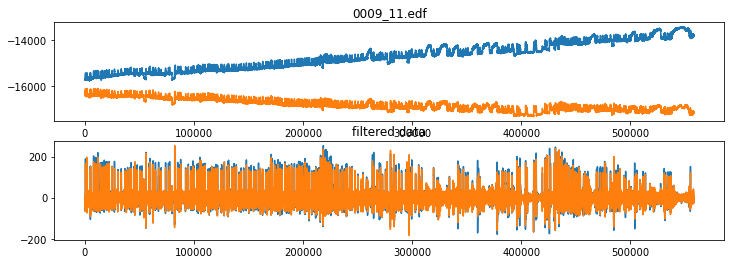

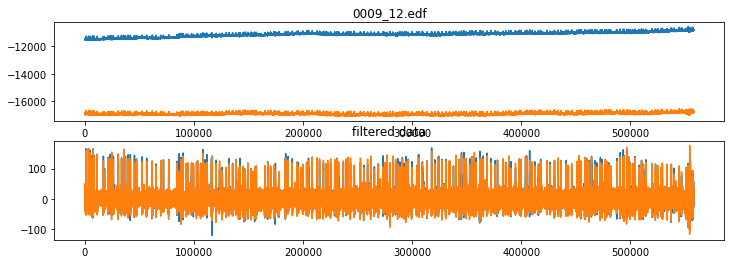

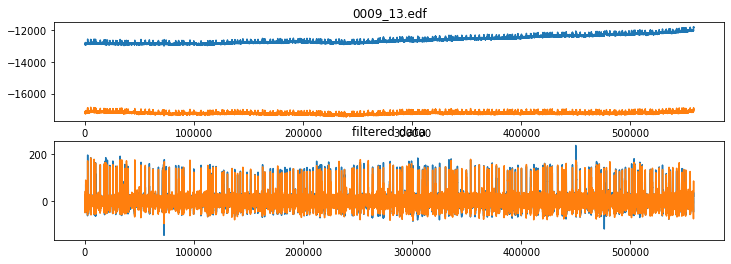

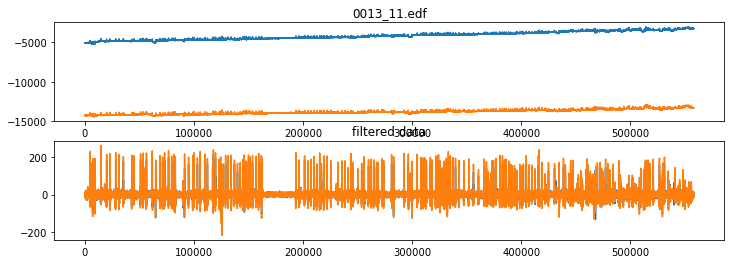

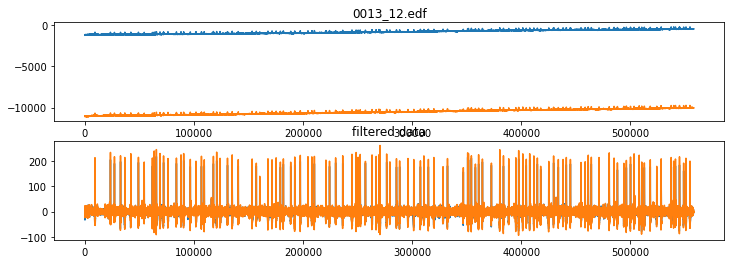

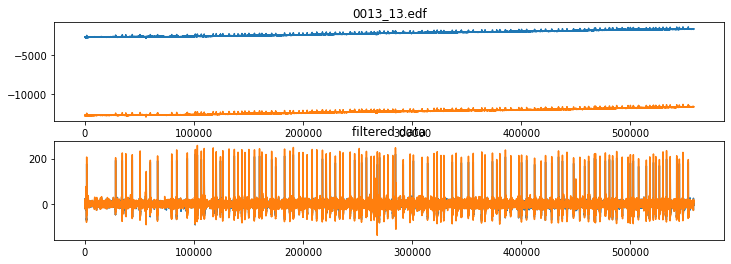

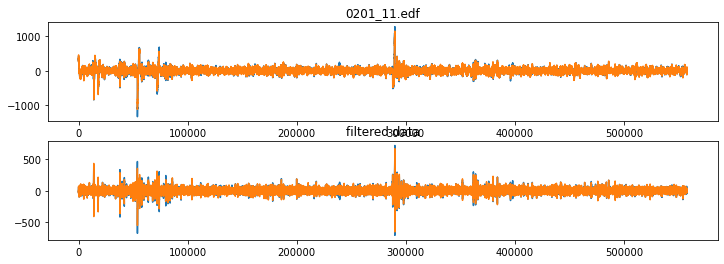

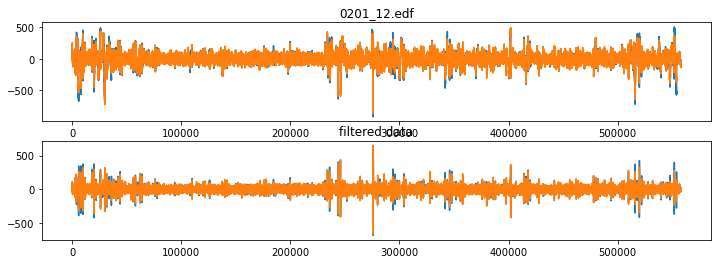

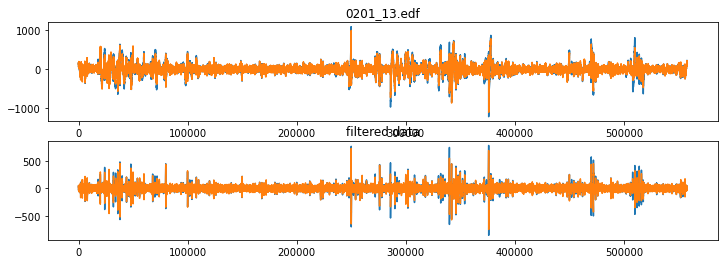

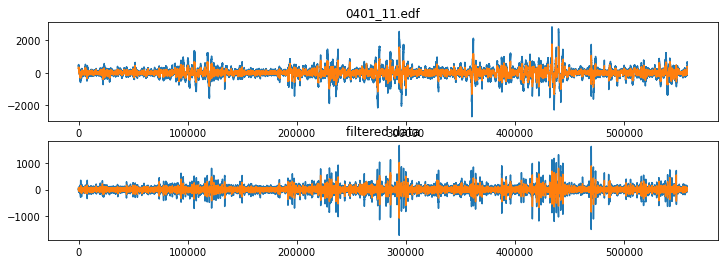

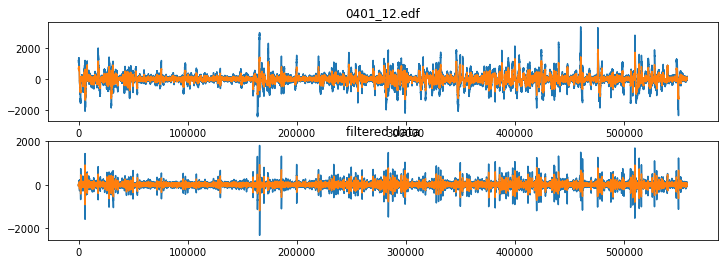

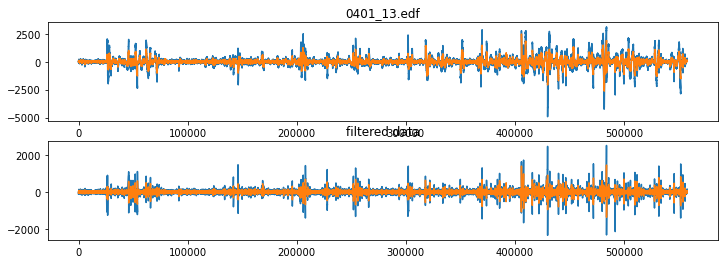

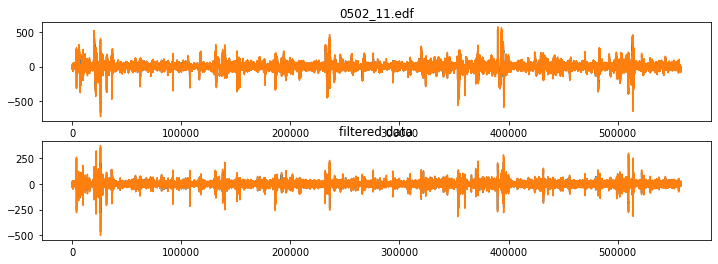

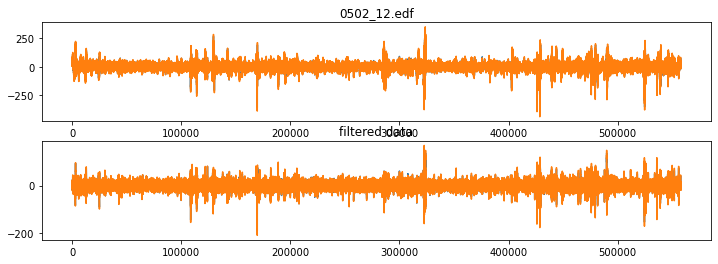

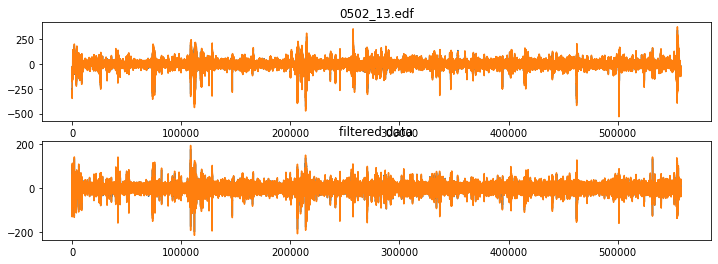

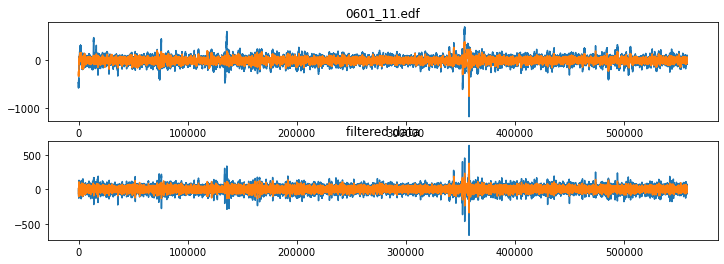

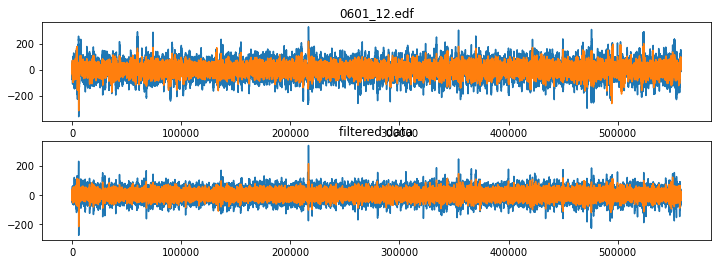

<Figure size 864x288 with 0 Axes>

In [5]:
################# Multiple subjects #########################
window_length = 1000
datacuts = []
labels = []
threshold = 100
sampleRate = 1000

b, a = filt_coef(2, 30, 'lowpass', sampleRate)
d, c = filt_coef(5, 1, 'highpass', sampleRate)

for fname in newls:
    
    plt.figure(figsize=(12,4))
    
    fpath = os.path.join(r"..\data\data3_attention\raw", fname)
    r = io.read_raw_edf(fpath)
    unfilter_datacut = r.load_data()[['Fp1','Fp2']][0]
    unfilter_datacut = np.array(unfilter_datacut)
    
    ax1 = plt.subplot(211)
    ax1.set_title("data")
    for ch in range(2):
        plt.title(fname)
        plt.plot(unfilter_datacut[ch])      
    
    unfilter_datacut[0] = scipy.signal.filtfilt(b, a, unfilter_datacut[0])
    unfilter_datacut[1] = scipy.signal.filtfilt(b, a, unfilter_datacut[1])
    unfilter_datacut[0] = scipy.signal.filtfilt(d, c, unfilter_datacut[0])
    unfilter_datacut[1] = scipy.signal.filtfilt(d, c, unfilter_datacut[1])
    
    ax2 = plt.subplot(212)
    ax2.set_title("filtered data")
    for ch in range(2):
        plt.plot(unfilter_datacut[ch])
    plt.savefig(r"..\data\data3_attention\fig\QC_fil_"+fname+".jpg")
        
#     datacut = datacut[:, ::2]
    
#     savepath = os.path.join(r"..\data\data3_attention\raw_filtered_baselineSubtracted_thres_fp1fp2_500Hz\raw_filtered_baselineSubtracted_thres_resampled500Hz_fp1fp2_"+ fname.split('.')[0]+'.csv')
#     pd.DataFrame({'FP1':datacut[0], 'FP2':datacut[1]}).to_csv(savepath)

#     l = datacut.shape[1] # data points
#     n = int(l / window_length) # number of cuts

#     # Triple classification: L/M/H
#     label = int(fname.split(".")[0][-1]) - 1    # 0,1,2
#     for start in [i * window_length for i in list(range(n))]:
# #         label = int(fname.split('_')[-2][1]) - 1
#         arr = datacut[:, start: start + window_length]
#         datacuts.append(arr)
#         labels.append(label)

#     print(len(datacuts))
